In [2]:
!pip install boto3 --upgrade -q
!pip install Pillow --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install scikit-learn --upgrade
!pip install psycopg2-binary --upgrade
!pip install requests --upgrade
!pip install requests_aws4auth --upgrade
!pip install pinecone-client --upgrade
!pip install threadpoolctl==3.1.0
!pip install numexpr==2.8.4
!pip install bottleneck==1.3.6

-- Embedding

In [3]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'amazon.titan-embed-text-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
hello
"""
input = {
        'inputText': prompt
    }
body=json.dumps(input)
response = bedrock.invoke_model(
    body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
embedding = response_body['embedding']
print(embedding)


[0.44140625, -0.037353516, -0.29882812, 0.359375, 0.55859375, 0.06591797, 0.34765625, -0.0006828308, 0.061279297, -0.025512695, 0.453125, 0.7109375, -0.021728516, -0.08691406, 0.34570312, -0.32226562, -0.21777344, -0.40234375, -0.8828125, 0.26171875, -0.48632812, 0.3515625, -0.037353516, 0.19726562, -0.7578125, -0.6796875, 0.68359375, -0.625, 0.20898438, -0.7890625, -0.18554688, 0.76171875, 0.46484375, -0.7109375, -0.15429688, -0.16113281, 0.40820312, -0.15820312, 0.5859375, 0.12792969, -0.25976562, -0.45703125, 1.046875, -0.21191406, 0.515625, -0.026000977, -0.55078125, 0.23046875, 0.84375, 0.484375, 0.36132812, 0.41015625, -0.5234375, -0.026977539, -0.053466797, 0.66015625, 0.22558594, -0.091796875, -0.0087890625, -0.53515625, 0.028198242, -0.4609375, -0.31054688, 0.65625, 0.609375, -0.3125, -0.72265625, 0.42382812, -0.47460938, -0.057128906, 0.4453125, -0.46289062, 0.265625, 0.49023438, 0.25390625, 0.14941406, 0.64453125, 0.14648438, 0.34765625, 0.38867188, 0.040771484, 0.19335938, 

In [6]:
size = len(embedding)
print(size)


1536


-Distância Euclidiana
que a medida da distância entre dois pontos em um espaço euclidiano


In [7]:
import json
import boto3
import math

def get_embedding(bedrock, text):
    modelId = 'amazon.titan-embed-text-v1'
    accept = 'application/json'
    contentType = 'application/json'
    input = {
            'inputText': text
        }
    body=json.dumps(input)
    response = bedrock.invoke_model(
        body=body, modelId=modelId, accept=accept,contentType=contentType)
    response_body = json.loads(response.get('body').read())
    embedding = response_body['embedding']
    return embedding

def calculate_distance(v1, v2):
    distance = math.dist(v1, v2)
    return distance

# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
text1 = 'hello'
text2 = 'good day'
v1 = get_embedding(bedrock, text1)
v2 = get_embedding(bedrock, text2)
distance = calculate_distance(v1, v2)
print(distance)


23.33325186409251


In [8]:
# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
hello = get_embedding(bedrock, 'hello')
texts = [
    'hi',
    'good day',
    'greetings',
    'how are you',
    'what is your name',
    "let's go shopping",
    'what is general relativity',
    'she sells sea shells on the sea shore'
]
for text in texts:
    embedding = get_embedding(bedrock, text)
    distance = calculate_distance(hello, embedding)
    print(distance)


9.094554322587365
23.33325186409251
15.699801139590388
20.948954281263347
24.261418207910705
25.30846242351385
29.69741947688189
26.700609050941793


Dot product similarity
O produto escalar (ou produto ponto) é uma operação matemática que envolve dois vetores de igual comprimento. Ele retorna um único número. Em geometria euclidiana, o produto escalar das coordenadas cartesianas de dois vetores é amplamente utilizado. A fórmula do produto escalar é:
u⋅v=∣u∣⋅∣v∣⋅cos(θ)

In [9]:
import json
import boto3
from numpy import dot
from numpy.linalg import norm

def get_embedding(bedrock, text):
    modelId = 'amazon.titan-embed-text-v1'
    accept = 'application/json'
    contentType = 'application/json'
    input = {
            'inputText': text
        }
    body=json.dumps(input)
    response = bedrock.invoke_model(
        body=body, modelId=modelId, accept=accept,contentType=contentType)
    response_body = json.loads(response.get('body').read())
    embedding = response_body['embedding']
    return embedding

def calculate_dot_product_similarity(v1, v2):
    similarity = dot(v1, v2)
    return similarity

# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
text1 = 'hello'
text2 = 'good day'
v1 = get_embedding(bedrock, text1)
v2 = get_embedding(bedrock, text2)
similarity = calculate_dot_product_similarity(v1, v2)
print(similarity)


245.3465466016232


In [10]:
# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
hello = get_embedding(bedrock, 'hello')
texts = [
    'hi',
    'good day',
    'greetings',
    'how are you',
    'what is your name',
    "let's go shopping",
    'what is general relativity',
    'she sells sea shells on the sea shore'
]
for text in texts:
    embedding = get_embedding(bedrock, text)
    similarity = calculate_dot_product_similarity(hello, embedding)
    print(similarity)


523.4078294500584
245.3465466016232
328.5758089531838
218.5153600999188
173.35412997474873
127.174288252552
69.75002899099037
94.28087665222931


Similaridade do coseno 

In [12]:
import json
import boto3
from numpy import dot
from numpy.linalg import norm

def get_embedding(bedrock, text):
    modelId = 'amazon.titan-embed-text-v1'
    accept = 'application/json'
    contentType = 'application/json'
    input = {
            'inputText': text
        }
    body=json.dumps(input)
    response = bedrock.invoke_model(
        body=body, modelId=modelId, accept=accept,contentType=contentType)
    response_body = json.loads(response.get('body').read())
    embedding = response_body['embedding']
    return embedding

def calculate_cousin_similarity(v1, v2):
    similarity = dot(v1, v2)/(norm(v1)*norm(v2))
    return similarity

# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
text1 = 'hello'
text2 = 'good day'
v1 = get_embedding(bedrock, text1)
v2 = get_embedding(bedrock, text2)
similarity = calculate_cousin_similarity(v1, v2)
print(similarity)


0.47547669109839213


In [13]:
# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
hello = get_embedding(bedrock, 'hello')
texts = [
    'hi',
    'good day',
    'greetings',
    'how are you',
    'what is your name',
    "let's go shopping",
    'what is general relativity',
    'she sells sea shells on the sea shore'
]
for text in texts:
    embedding = get_embedding(bedrock, text)
    similarity = calculate_cousin_similarity(hello, embedding)
    print(similarity)


0.9268443924716357
0.47547669109839213
0.7481008999511818
0.5187598232110757
0.3777644972419649
0.29329218796125756
0.13715628607522645
0.21532926299725408


In [14]:
def search(dataset, v):
    for item in dataset:
        item['distance'] = calculate_distance(item['embedding'], v)
    dataset.sort(key=lambda x: x['distance'])
    return dataset[0]['text']
    
# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
# the data set
t1 = """
The theory of general relativity says that the observed gravitational effect between masses results from their warping of spacetime. 
"""
t2 = """
Quantum mechanics allows the calculation of properties and behaviour of physical systems. It is typically applied to microscopic systems: molecules, atoms and sub-atomic particles. 
"""
t3 = """
Wavelet theory is essentially the continuous-time theory that corresponds to dyadic subband transforms — i.e., those where the L (LL) subband is recursively split over and over.
"""
t4 = """
Every particle attracts every other particle in the universe with a force that is proportional to the product of their masses and inversely proportional to the square of the distance between their centers.
"""
t5 = """
The electromagnetic spectrum is the range of frequencies (the spectrum) of electromagnetic radiation and their respective wavelengths and photon energies. 
"""
dataset = [
    {'text': t1, 'embedding': get_embedding(bedrock, t1)}, 
    {'text': t2, 'embedding': get_embedding(bedrock, t2)}, 
    {'text': t3, 'embedding': get_embedding(bedrock, t3)}, 
    {'text': t4, 'embedding': get_embedding(bedrock, t4)}, 
    {'text': t5, 'embedding': get_embedding(bedrock, t5)}
]
# perform a search for Albert Einstein
query = 'Isaac Newton'
v = get_embedding(bedrock, query)              
result = search(dataset, v)
print(result)



Every particle attracts every other particle in the universe with a force that is proportional to the product of their masses and inversely proportional to the square of the distance between their centers.



classification 

In [15]:
def classify(classes, v):
    for item in classes:
        item['distance'] = calculate_distance(item['embedding'], v)
    classes.sort(key=lambda x: x['distance'])
    return classes[0]['name']
    
# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
# the data set
classes = [    
    {'name': 'athletics', 'description': 'all students with a talent in sports'}, 
    {'name': 'musician', 'description': 'all students with a talent in music'}, 
    {'name': 'magician', 'description': 'all students with a talent in witch craft'}
]
for item in classes:
    item['embedding'] = get_embedding(bedrock, item['description'])
# perform a classification
query = 'Ellison sends a spell to prevent Professor Wang from entering the classroom'
v = get_embedding(bedrock, query)              
result = classify(classes, v)
print(result)


magician


When we look at the following name list, we know some of them are physicists and some of them are musicians. However, if we randomly pick some names from two other fields that we are not familiar with, how can we correctly allocate those names into two groups without knowing what the groups are?

names = ['Albert Einstein', 'Bob Dylan', 'Elvis Presley', 
         'Isaac Newton', 'Michael Jackson', 'Niels Bohr', 
         'Taylor Swift', 'Hank Williams', 'Werner Heisenberg', 
         'Stevie Wonder', 'Marie Curie', 'Ernest Rutherford']
Clustering is a technique to identify hidden groupings in data, with K-means clustering being a commonly used clustering algorithm. Here “K” refers to the number of groups, which is a hyper-parameter determined by a human. Once the number of groups are determined, documents close to each other are said to belong to the same group.


In [16]:
import json
import boto3
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def get_embedding(bedrock, text):
    modelId = 'amazon.titan-embed-text-v1'
    accept = 'application/json'
    contentType = 'application/json'
    input = {
            'inputText': text
        }
    body=json.dumps(input)
    response = bedrock.invoke_model(
        body=body, modelId=modelId, accept=accept,contentType=contentType)
    response_body = json.loads(response.get('body').read())
    embedding = response_body['embedding']
    return embedding

# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
names = ['Albert Einstein', 'Bob Dylan', 'Elvis Presley', 
         'Isaac Newton', 'Michael Jackson', 'Niels Bohr', 
         'Taylor Swift', 'Hank Williams', 'Werner Heisenberg', 
         'Stevie Wonder', 'Marie Curie', 'Ernest Rutherford']
embeddings = []
for name in names:
    embeddings.append(get_embedding(bedrock, name))
# clustering
df = pd.DataFrame(data={'names': names, 'embeddings': embeddings})
matrix = np.vstack(df.embeddings.values)
n_clusters = 2
kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
df['cluster'] = kmeans.labels_
# result
print(df[['cluster', 'names']])


    cluster              names
0         1    Albert Einstein
1         0          Bob Dylan
2         0      Elvis Presley
3         1       Isaac Newton
4         0    Michael Jackson
5         1         Niels Bohr
6         0       Taylor Swift
7         0      Hank Williams
8         1  Werner Heisenberg
9         0      Stevie Wonder
10        1        Marie Curie
11        1  Ernest Rutherford


You might wonder why we do not use the Euclidean distance any where in the calculation. We do, but it was all wrapped into the scikit-learn package. If we expose the details on how K-means clustering works this tutorial will become quite messy.

To give you a better understanding of how clustering is done, you can use the following sample code to generate a 2D plot.

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


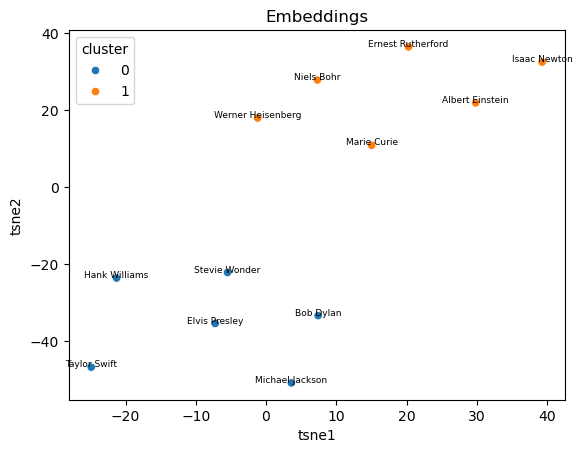

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce number of dimensions from 1536 to 2
tsne = TSNE(random_state=0, n_iter=1000, perplexity=6)
tsne_results = tsne.fit_transform(np.array(df['embeddings'].to_list(), dtype=np.float32))
# Add the results to dataframe as a new column
df['tsne1'] = tsne_results[:, 0]
df['tsne2'] = tsne_results[:, 1]

# Plot the data and annotate the result
fig, ax = plt.subplots()
ax.set_title('Embeddings')
sns.scatterplot(data=df, x='tsne1', y='tsne2', hue='cluster', ax=ax)
for idx, row in df.iterrows():
    ax.text(row['tsne1'], row['tsne2'], row['names'], fontsize=6.5, horizontalalignment='center')

plt.show()


Anomaly detection

In [18]:
def find_outliers_by_count(dataset, count):
    # find the center of mass
    embeddings = []
    for item in dataset:
        embeddings.append(item['embedding'])
    center = np.mean(embeddings, axis=0)
    # calculate distance from center
    for item in dataset:
        item['distance'] = calculate_distance(item['embedding'], center)
    # sort the distances in reverse order
    dataset.sort(key=lambda x: x['distance'], reverse=True)
    # return N outliers
    return dataset[0:count]

# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
names = ['Albert Einstein', 'Isaac Newton', 'Stephen Hawking', 
         'Galileo Galilei', 'Niels Bohr', 'Werner Heisenberg', 
         'Marie Curie', 'Ernest Rutherford', 'Michael Faraday', 
         'Richard Feynman', 'Lady Gaga', 'Erwin Schrödinger', 
         'Max Planck', 'Enrico Fermi', 'Taylor Swift', 'Lord Kelvin']
dataset = []
for name in names:
    embedding = get_embedding(bedrock, name)
    dataset.append({'name': name, 'embedding': embedding})
outliers = find_outliers_by_count(dataset, 2)
for item in outliers:
    print(item['name'])


Taylor Swift
Lady Gaga


In [19]:
def find_outliers_by_percentage(dataset, percent):
    # find the center of mass
    embeddings = []
    for item in dataset:
        embeddings.append(item['embedding'])
    center = np.mean(embeddings, axis=0)
    # calculate distance from center
    for item in dataset:
        item['distance'] = calculate_distance(item['embedding'], center)
    # sort the distances in reverse order
    dataset.sort(key=lambda x: x['distance'], reverse=True)
    # return top x% outliers
    total = len(dataset)
    count = math.floor(percent * total / 100)
    return dataset[0:count]

# change the main function to use find_outliers_by_distance()
entries = find_outliers_by_percentage(dataset, 20)
for item in entries:
    print(item['name'])


Taylor Swift
Lady Gaga
Stephen Hawking


In [20]:
def find_outliers_by_distance(dataset, percent):
    # find the center of mass
    embeddings = []
    for item in dataset:
        embeddings.append(item['embedding'])
    center = np.mean(embeddings, axis=0)
    # calculate distance from center
    for item in dataset:
        item['distance'] = calculate_distance(item['embedding'], center)
    # sort the distances in reverse order
    dataset.sort(key=lambda x: x['distance'], reverse=True)
    # return outliers beyond x% of max distance
    max_distance = dataset[0]['distance']
    min_distance = percent * max_distance / 100
    outliers = []
    for item in dataset:
        if item['distance'] >= min_distance:
            outliers.append(item)
    return outliers

# change the main function to use find_outliers_by_distance()
entries = find_outliers_by_distance(dataset, 80)
for item in entries:
    print(item['name'])


Taylor Swift
Lady Gaga


Vector Databases

In [21]:
import json
import boto3

def get_embedding(bedrock, text):
    modelId = 'amazon.titan-embed-text-v1'
    accept = 'application/json'
    contentType = 'application/json'
    input = {
            'inputText': text
        }
    body=json.dumps(input)
    response = bedrock.invoke_model(
        body=body, modelId=modelId, accept=accept,contentType=contentType)
    response_body = json.loads(response.get('body').read())
    embedding = response_body['embedding']
    return embedding

# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
# some random data
people = ['Albert Einstein', 'Isaac Newton', 'Stephen Hawking', 
          'Galileo Galilei', 'Niels Bohr', 'Werner Heisenberg', 
          'Marie Curie', 'Ernest Rutherford', 'Michael Faraday', 'Richard Feynman']
actions = ['plays basketball', 'teaches physics', 'sells sea shells', 
           'collects tax', 'drives buses', 'researches into gravity', 
           'manages a shop', 'supervises graduate students', 
           'works as a support engineer', 'runs a bank']
places = ['London', 'Sydney', 'Los Angeles', 'San Francisco', 'Beijing', 
          'Cape Town', 'Paris', 'Cairo', 'New Delhi', 'Seoul']
# create a data file
count = 10000
with open('dataset.json', 'w') as outfile:
    for name in people:
        for action in actions:
            for place in places:
                id   = count
                text = '{name} {action} in {place}.'.format(name=name, action=action, place=place)
                embedding = get_embedding(bedrock, text)
                item = {'id': id, 'text': text, 'embedding': embedding}
                json_object = json.dumps(item)
                outfile.write(json_object + '\n')
                count = count + 1
    print('Dataset created.')


Dataset created.


In [22]:
import json
import boto3
import math
from datetime import datetime

def get_embedding(bedrock, text):
    modelId = 'amazon.titan-embed-text-v1'
    accept = 'application/json'
    contentType = 'application/json'
    input = {
            'inputText': text
        }
    body=json.dumps(input)
    response = bedrock.invoke_model(
        body=body, modelId=modelId, accept=accept,contentType=contentType)
    response_body = json.loads(response.get('body').read())
    embedding = response_body['embedding']
    return embedding

def load_dataset(filename):
    dataset = []
    with open(filename) as file:
        for line in file:
            dataset.append(json.loads(line))
    return dataset

def calculate_distance(v1, v2):
    distance = math.dist(v1, v2)
    return distance
    
def search(dataset, embedding):
    t1 = datetime.now()
    for item in dataset:
        item['distance'] = calculate_distance(item['embedding'], embedding)
    t2 = datetime.now()
    delta = t2 - t1
    ms1 = 1000 * delta.total_seconds()
    dataset.sort(key=lambda x: x['distance'])
    t3 = datetime.now()
    delta = t3 - t2
    ms2 = 1000 * delta.total_seconds()
    print(str(ms1) + 'ms in calculating distances')
    print(str(ms2) + 'ms in sorting distances')
    return dataset[0]['text']

# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
dataset = load_dataset('dataset.json')
query   = 'Lady Gaga purchased a necklace in Singapore.'
embedding = get_embedding(bedrock, query)
result  = search(dataset, embedding)
print(result)


51.099ms in calculating distances
0.331ms in sorting distances
Marie Curie sells sea shells in Los Angeles.


pgvector

In [23]:
secret_name = 'bedrock-workshop-90433490'


In [24]:
import json
import boto3
import psycopg2
from botocore.exceptions import ClientError

def get_secrets():
    client = boto3.client(
        service_name='secretsmanager',
    )
    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e
    secrets = json.loads(get_secret_value_response['SecretString'])
    return secrets
    
def load_dataset(filename):
    dataset = []
    with open(filename) as file:
        for line in file:
            dataset.append(json.loads(line))
    return dataset
    
# main function
secrets = get_secrets()
conn = psycopg2.connect(
    host=secrets['db_hostname'],
    port=secrets['db_hostport'],
    user=secrets['db_username'],
    password=secrets['db_password'],
    database=secrets['db_database']
)
cursor = conn.cursor()
cursor.execute('CREATE EXTENSION vector')
cursor.execute('CREATE TABLE dataset (id SERIAL, content TEXT, embedding VECTOR(1536))')
conn.commit()
print('Table created.')


Table created.


In [25]:
### Load sample data
import json
import boto3
import psycopg2
from botocore.exceptions import ClientError

def get_secrets():
    client = boto3.client(
        service_name='secretsmanager',
    )
    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e
    secrets = json.loads(get_secret_value_response['SecretString'])
    return secrets
    
def load_dataset(filename):
    dataset = []
    with open(filename) as file:
        for line in file:
            dataset.append(json.loads(line))
    return dataset
    
# main function
secrets = get_secrets()
conn = psycopg2.connect(
    host=secrets['db_hostname'],
    port=secrets['db_hostport'],
    user=secrets['db_username'],
    password=secrets['db_password'],
    database=secrets['db_database']
)
cursor = conn.cursor()
# populate the data into the database
sql = 'INSERT INTO dataset (content, embedding) VALUES(%s, %s)'
dataset = load_dataset('dataset.json')
for item in dataset:
    cursor.execute(sql, (item['text'], item['embedding']))
conn.commit()
print('Loaded data into table.')


Loaded data into table.


In [27]:
## Perform a search 
import json
import boto3
import psycopg2
from botocore.exceptions import ClientError
from datetime import datetime

def get_secrets():
    client = boto3.client(
        service_name='secretsmanager',
    )
    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e
    secrets = json.loads(get_secret_value_response['SecretString'])
    return secrets

def get_embedding(bedrock, text):
    modelId = 'amazon.titan-embed-text-v1'
    accept = 'application/json'
    contentType = 'application/json'
    input = {
            'inputText': text
        }
    body=json.dumps(input)
    response = bedrock.invoke_model(
        body=body, modelId=modelId, accept=accept,contentType=contentType)
    response_body = json.loads(response.get('body').read())
    embedding = response_body['embedding']
    return embedding

def search(bedrock, cursor, query, limit):
    embedding = str(get_embedding(bedrock, query))
    sql = 'SELECT id, content FROM dataset ORDER BY embedding <-> %s LIMIT %s'
    cursor.execute(sql, (embedding, limit))
    result = []
    for row in cursor:
        result.append(row)
    return result
    
# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
secrets = get_secrets()
conn = psycopg2.connect(
    host=secrets['db_hostname'],
    port=secrets['db_hostport'],
    user=secrets['db_username'],
    password=secrets['db_password'],
    database=secrets['db_database']
)
cursor = conn.cursor()
query   = 'Lady Gaga purchased a necklace in Singapore.'
result = search(bedrock, cursor, query, 1)
print(result)


[(623, 'Marie Curie sells sea shells in Los Angeles.')]


In [ ]:
region = 'us-west-2'
host = 'https://********.********.aoss.amazonaws.com'
